In [59]:
import pandas as pd
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

In [18]:
df = pd.read_sas(r'C:\Users\1000257489\Documents\2022\Programs\20220915 Media Bay 3 Bin\0920\overall_data_3bin.sas7bdat', format = 'sas7bdat', encoding='iso-8859-1')
df.shape

(689652, 3)

In [19]:
df.head()

,OW_R0_DB,TSE2,RMK
0,27.427299,0.0,GC5_PHO_3bin_BadBay_BFWK26
1,26.076000,0.0,GC5_PHO_3bin_GoodBay_BFWK26
2,27.151100,0.0,GC5_PHO_3bin_BadBay_BFWK26
3,27.399700,0.0,GC5_PHO_3bin_BadBay_BFWK26
4,27.452801,0.0,GC5_PHO_3bin_BadBay_BFWK26


In [20]:
df['RMK'].value_counts()

GC5_PHO_3bin_GoodBay_BFWK26    319086
GC5_PHO_3bin_GoodBay_AFWK26    229549
GC5_PHO_3bin_BadBay_AFWK26      70859
GC5_PHO_3bin_BadBay_BFWK26      70158
Name: RMK, dtype: int64

In [22]:
df['OWP_BIN'] = np.round(df['OW_R0_DB']/0.5, 0)*0.5
df.groupby('OWP_BIN')['OW_R0_DB'].agg(['min', 'max', 'count'])

,min,max,count
OWP_BIN,,,
19.5,19.674900,19.674900,1
21.0,20.785801,21.203600,13
21.5,21.280100,21.749701,45
22.0,21.751600,22.249201,97
22.5,22.256100,22.748501,269
23.0,22.750299,23.247499,494
23.5,23.250401,23.747999,893
24.0,23.750000,24.249901,1841
24.5,24.250200,24.748400,4477


In [32]:
summary_df = df.groupby(['OWP_BIN', 'RMK'], as_index=False)['TSE2'].agg({'TSE2_FR': 'mean',
                                                                        'Qty': 'count'})
summary_df.head()

,OWP_BIN,RMK,TSE2_FR,Qty
0,19.5,GC5_PHO_3bin_GoodBay_AFWK26,0.0,1
1,21.0,GC5_PHO_3bin_BadBay_AFWK26,0.0,2
2,21.0,GC5_PHO_3bin_BadBay_BFWK26,0.0,1
3,21.0,GC5_PHO_3bin_GoodBay_AFWK26,0.0,3
4,21.0,GC5_PHO_3bin_GoodBay_BFWK26,0.0,7


In [67]:
summary_df['TSE2_FR'].value_counts()

0.000000    123
0.030303      1
0.000038      1
0.000485      1
0.000126      1
0.000031      1
0.000045      1
0.000105      1
0.000012      1
0.000039      1
0.000543      1
0.000075      1
0.000736      1
0.000062      1
0.000877      1
0.000154      1
0.000509      1
0.000642      1
0.001009      1
0.002257      1
0.001709      1
0.000055      1
Name: TSE2_FR, dtype: int64

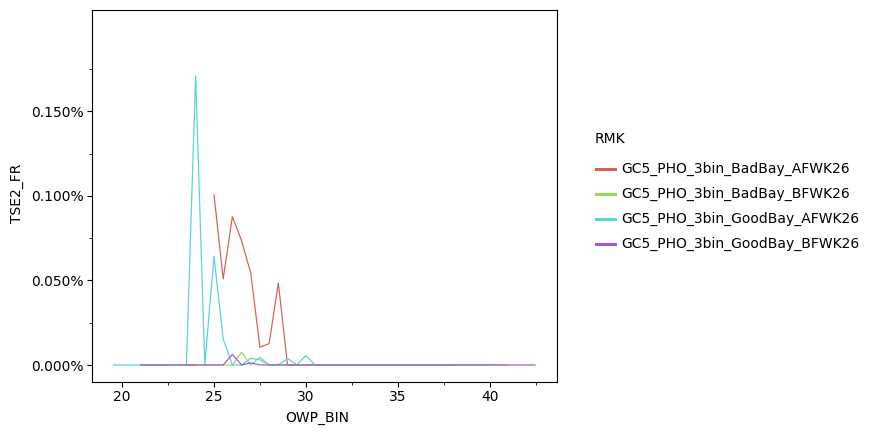

In [71]:
p = (ggplot(summary_df, aes(x='OWP_BIN', y='TSE2_FR', color='RMK'))
     + geom_line()
     + scale_y_continuous(breaks=np.arange(0, 0.002, 0.0005), limits=[0, 0.002], labels=percent_format())
     + theme_matplotlib()
     + theme(aspect_ratio=0.8,
             dpi=100,
             figure_size=(6, 4))
    )
print(p)